# Association Rules : My Movies Database

What is business objective?
    Business objective of this dataset is to check which movies can be recommended to customers

Constraints: Number of product combinations limited

In [1]:
# importing necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
dataset = pd.read_csv('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\Association\\my_movies.csv')
dataset.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
dataset.shape

(10, 15)

In [4]:
# Checking totaln number of movies in the dataset

all_movies = list(dataset.V1)+list(dataset.V2)+list(dataset.V3)+list(dataset.V4)+list(dataset.V5)
unique_movies = set(all_movies)
total_unique_movies = len(unique_movies)
unique_movies,total_unique_movies

({'Braveheart',
  'Gladiator',
  'Green Mile',
  'Harry Potter1',
  'Harry Potter2',
  'LOTR',
  'LOTR1',
  'LOTR2',
  'Patriot',
  'Sixth Sense',
  nan},
 11)

There are 10 different movies in the dataset, thus 9 dummy columns should be present (NaN is present in the dataset hence the length of total unique movies is 11)

<AxesSubplot:xlabel='count'>

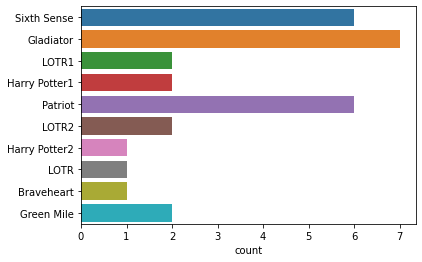

In [5]:
# Barplot of frequency of movies
sns.countplot(y = all_movies)

Gladiator is the most watched movie followed by Sixth Sense

In [6]:
# Dropping irrelevant features
# Considering only 9 dummy features
dum_data = dataset.iloc[:,6:]
dum_data

,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,0,1,1,0,1,0,0,0,1
1,1,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0
7,1,0,0,1,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,1,0,1


In [7]:
# Importing apriori and association rules

from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(dum_data,min_support = 0.0075,use_colnames = True, max_len = 4)
frequent_itemsets = frequent_itemsets.sort_values('support',ascending = False)
frequent_itemsets

C:\Users\vaibh\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.7,(Gladiator)
3,0.6,(Patriot)
9,0.6,"(Patriot, Gladiator)"
8,0.2,(Green Mile)
1,0.2,(LOTR1)
14,0.2,"(LOTR1, LOTR2)"
4,0.2,(LOTR2)
2,0.2,(Harry Potter1)
6,0.1,(LOTR)
19,0.1,"(Patriot, Braveheart)"


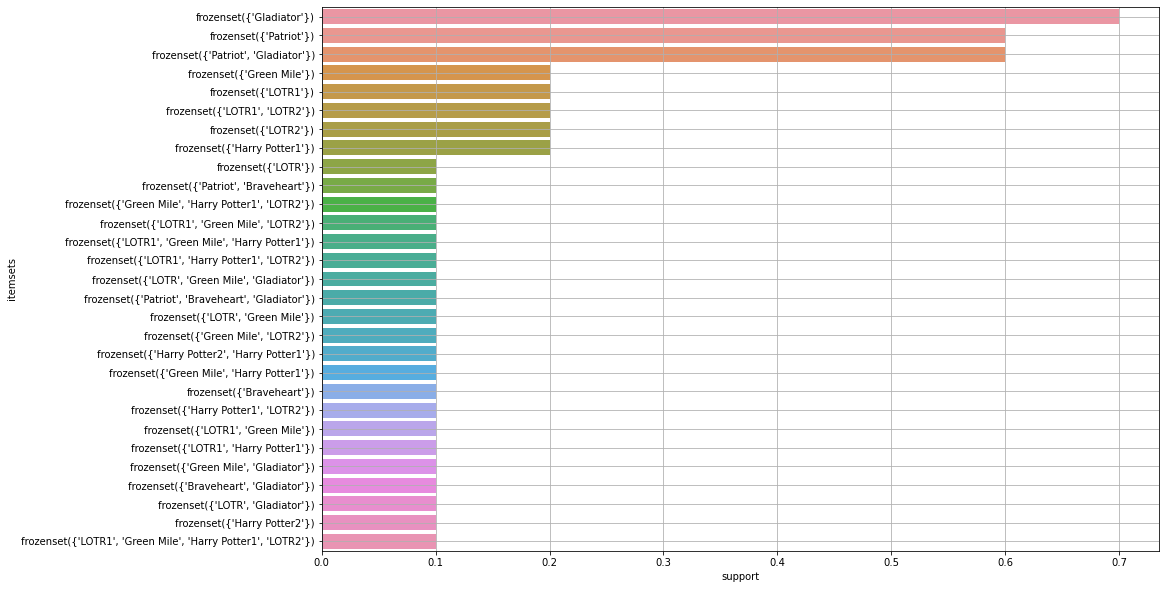

In [8]:
# Barplot of the supports for first 12 itemsets 
plt.figure(figsize=(15,10))
sns.barplot(x = frequent_itemsets['support'],y = frequent_itemsets['itemsets'])
plt.grid()
plt.show()

Gladiator alone has the most views i.e. 70% 

Patriot and (Patriot,Gladiator) are second most viewed i.e. 60% 

In [9]:
# Association rules of the dataset

rules = association_rules(frequent_itemsets,metric = 'lift',min_threshold = 1)
rules = rules.sort_values('lift',ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
69,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
32,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
65,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
41,(Gladiator),"(Patriot, Braveheart)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
36,"(Patriot, Braveheart)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
35,(Gladiator),"(LOTR, Green Mile)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
30,"(LOTR, Green Mile)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf


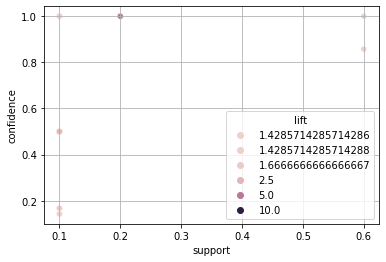

In [10]:
# Scatter plot 
sns.scatterplot(x = rules.support, y = rules.confidence, hue = rules.lift)
plt.grid()

Observations:
1. In the dataset, 74 rules were found using apriori algorithm
3. Lift ratio ranges from 1.4 to 10
4. The highest lift ratio corresponds to confidence value of 1 and support value of 0.1 to 0.2